In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics import tsaplots

sns.set(rc={'figure.figsize':(15,10)})

daily_total = pd.read_csv('daily-total-female-births-in-cal.csv')
international_airline = pd.read_csv('international-airline-passengers.csv')
mean_monthly = pd.read_csv('mean-monthly-air-temperature-deg.csv')
monthly_boston = pd.read_csv('monthly-boston-armed-robberies-j.csv')
monthly_sales = pd.read_csv('monthly-sales-of-company-x-jan-6.csv')
weekly_closings = pd.read_csv('weekly-closings-of-the-dowjones-.csv')

#Daily total female births

([<matplotlib.axis.XTick at 0x7f6f59008a30>,
 [Text(1, 0, '1959-01-02'),
  Text(76, 0, '1959-03-18'),
  Text(151, 0, '1959-06-01'),
  Text(226, 0, '1959-08-15'),
  Text(301, 0, '1959-10-29')])

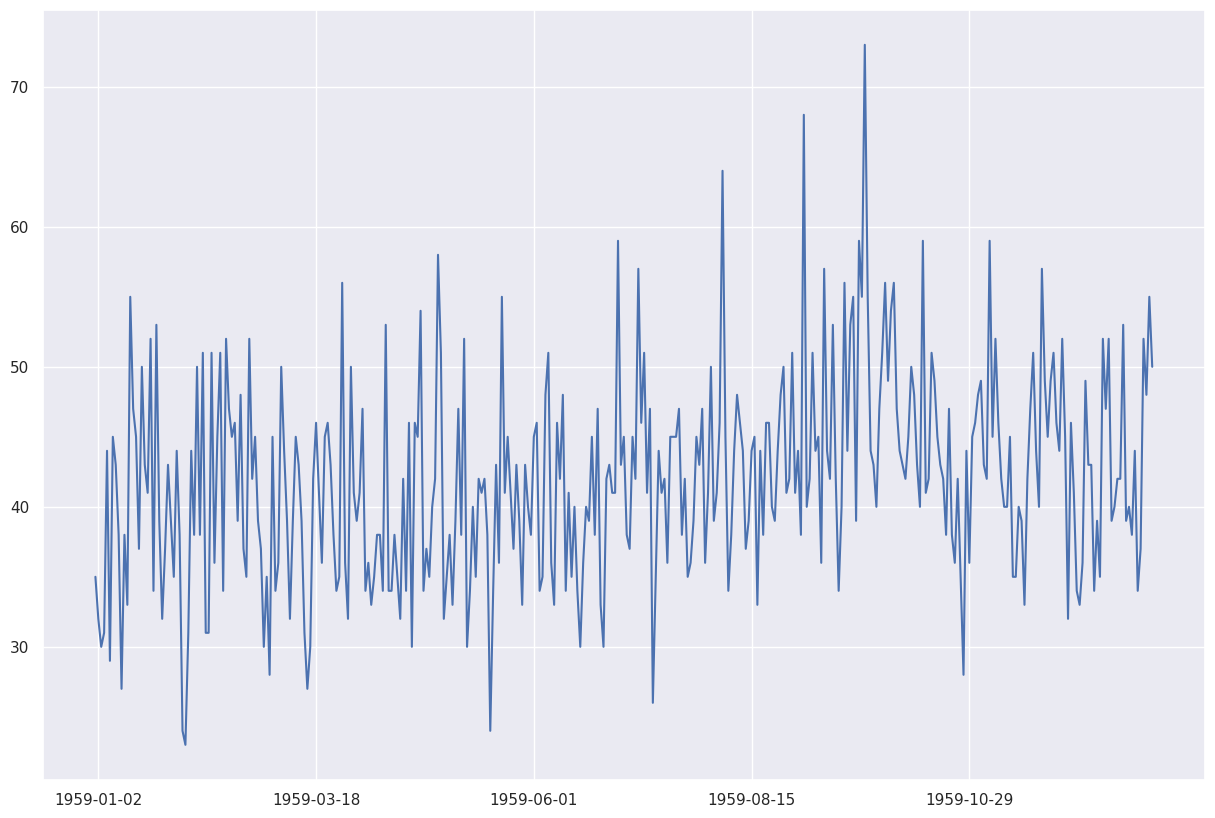

In [3]:
plt.plot(daily_total[daily_total.columns[0]], daily_total[daily_total.columns[1]])
plt.xticks(range(1, daily_total.shape[0], 75))

In [4]:
print(f'p-value: {adfuller(daily_total.iloc[:, 1])[1]}')

p-value: 5.2434129901498554e-05


p-value < 0.05; делаем вывод о том, что исходный ряд стационарен

#International airline passengers

([<matplotlib.axis.XTick at 0x7f6f58f39360>,
 [Text(1, 0, '1949-02'), Text(76, 0, '1955-05')])

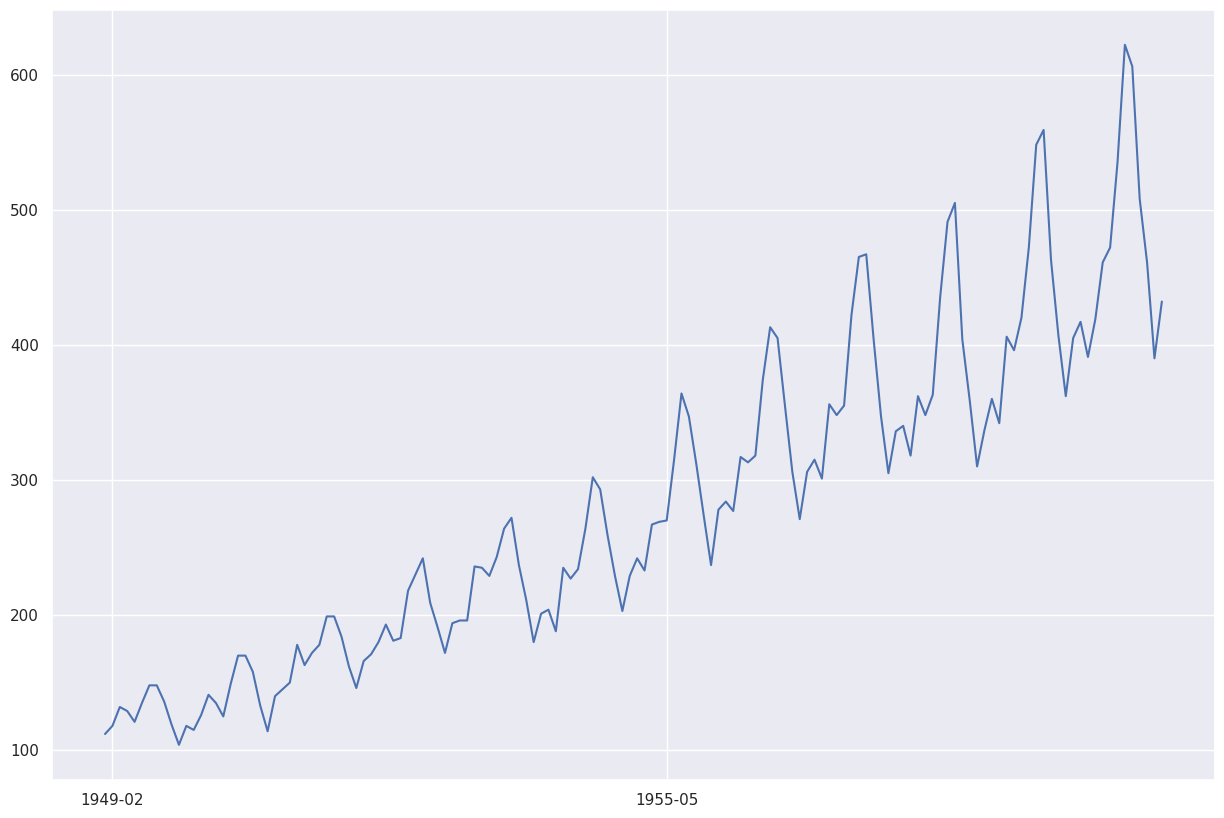

In [5]:
plt.plot(international_airline[international_airline.columns[0]], international_airline[international_airline.columns[1]])
plt.xticks(range(1, international_airline.shape[0], 75))

По графику видно, что ряд нестационарен

Избавимся от монотонно возрастающей дисперсии

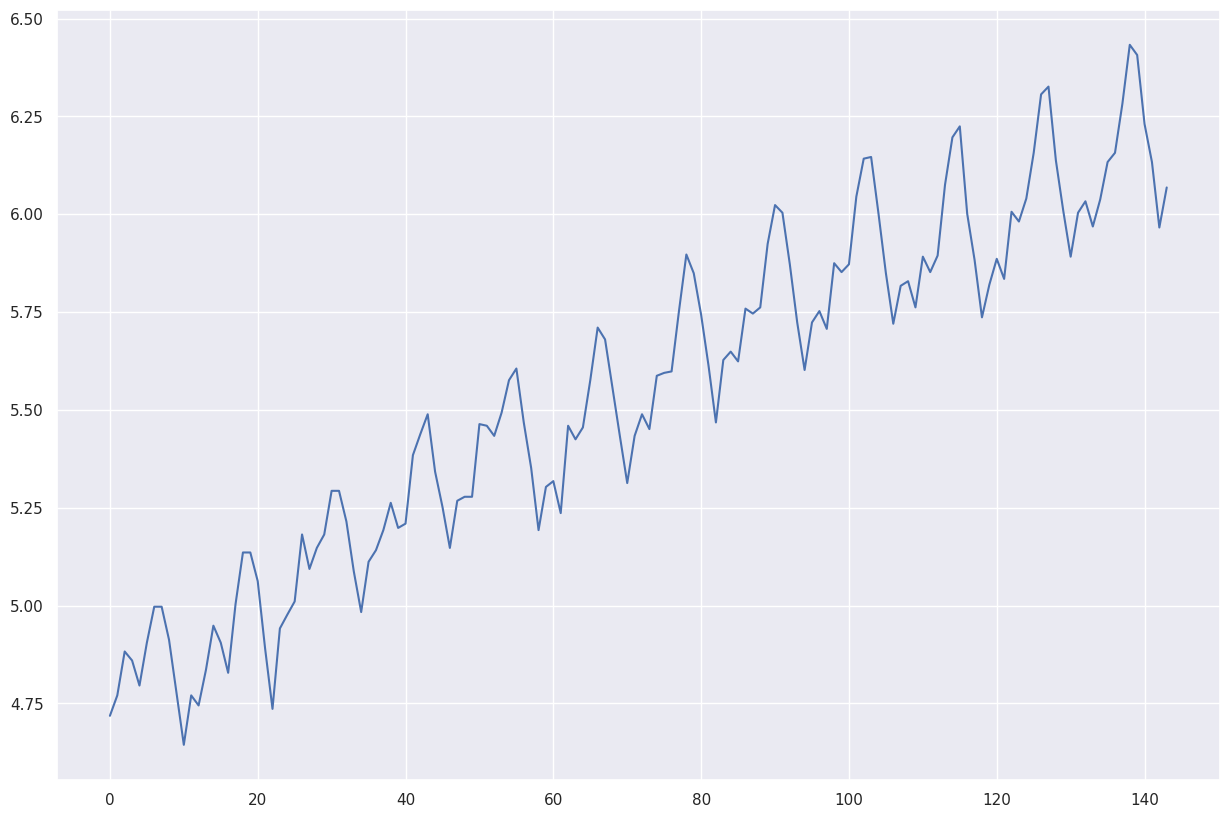

In [6]:
international_airline_series = (np.log(international_airline.iloc[:, 1]))
plt.plot(international_airline_series)

Избавимся от тренда

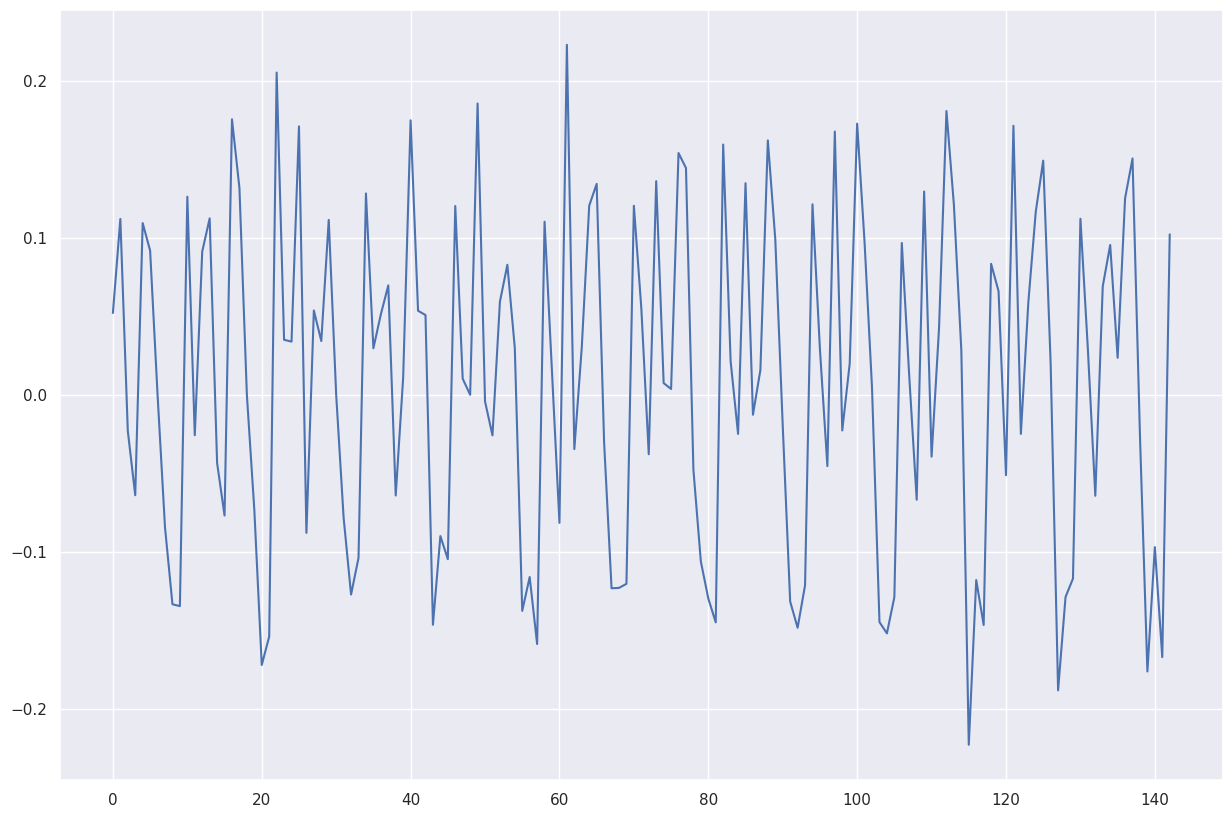

In [7]:
international_airline_series = np.diff(international_airline_series, 1)
plt.plot(international_airline_series)

Ряд почти похож на стационарный, но видна сезонность

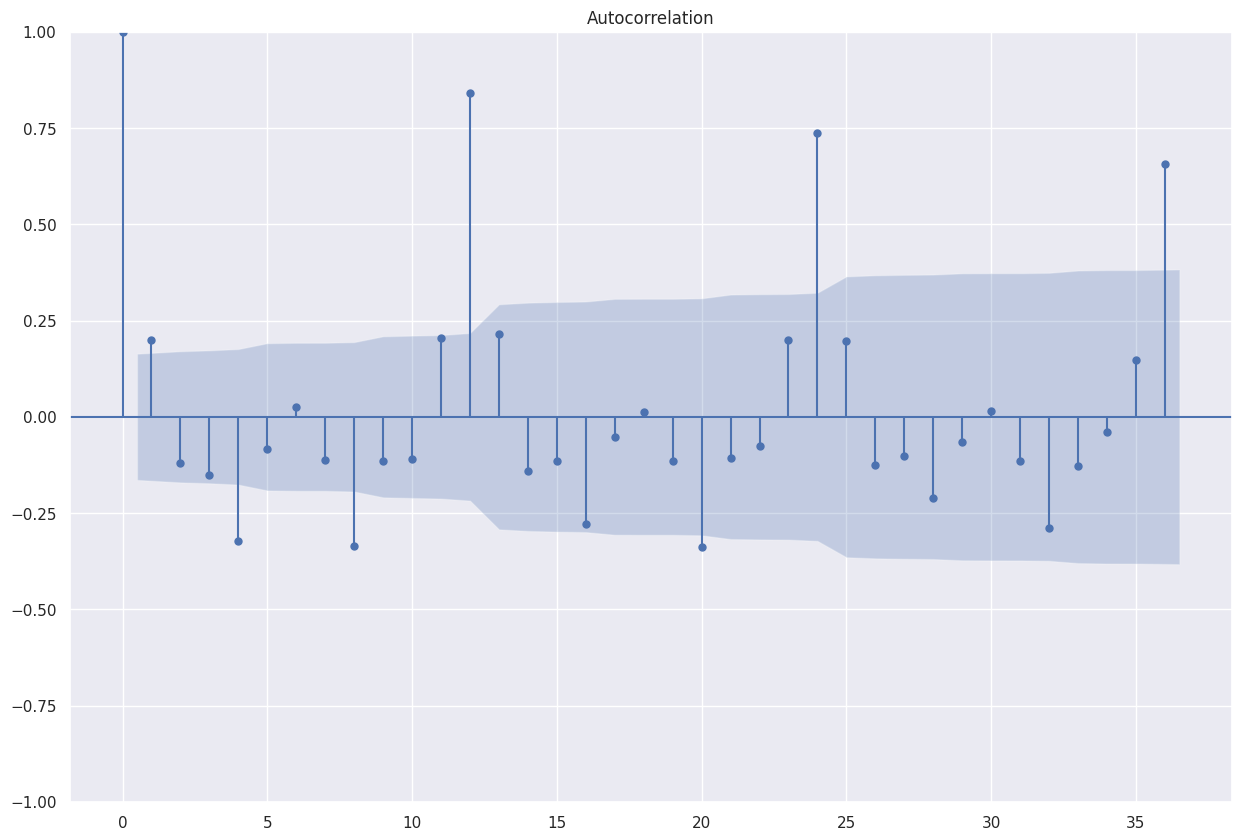

In [8]:
fig = tsaplots.plot_acf(international_airline_series, lags=36)
plt.show()

Скорее всего, сезонность 12

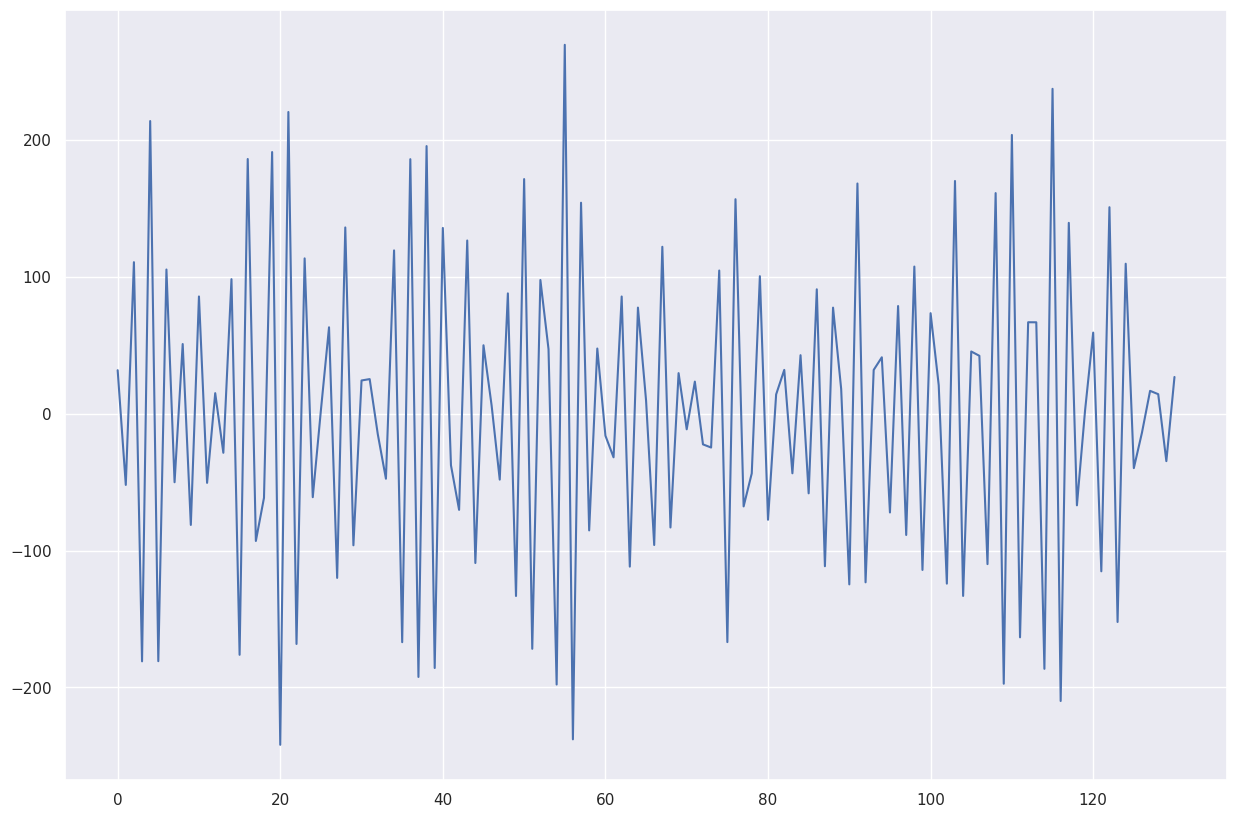

In [9]:
international_airline_series = np.diff(international_airline_series, 12)
plt.plot(international_airline_series)

Ряд похож на стационарный, проведём тест

In [10]:
print(f'p-value: {adfuller(international_airline_series)[1]}')

p-value: 5.255377690806885e-29


p-value < 0.05; ряд стационарен

#Mean monthly air temperature

([<matplotlib.axis.XTick at 0x7f6f53a70e20>,
 [Text(1, 0, '1920-02'),
  Text(76, 0, '1926-05'),
  Text(151, 0, '1932-08'),
  Text(226, 0, '1938-11')])

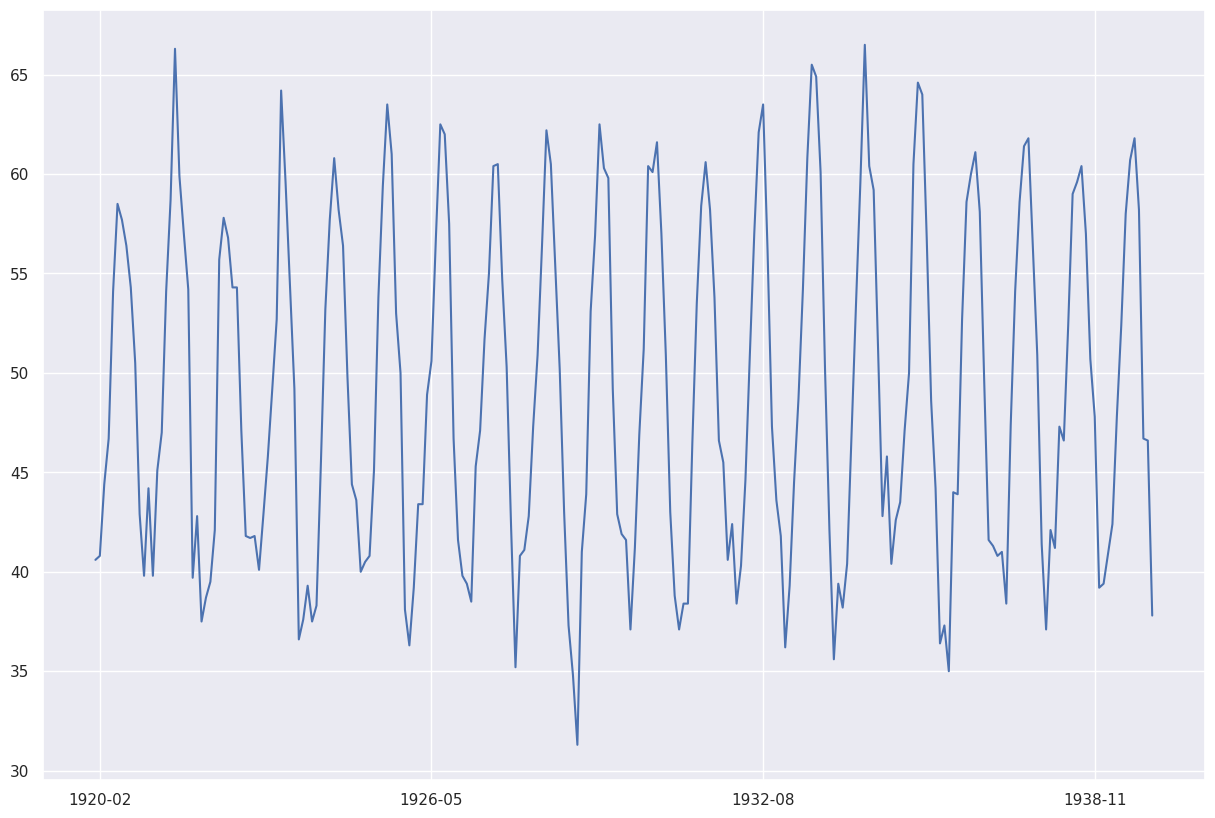

In [30]:
plt.plot(mean_monthly[mean_monthly.columns[0]], mean_monthly[mean_monthly.columns[1]])
plt.xticks(range(1, mean_monthly.shape[0], 75))

Данный временной ряд явно имеет сезонность, узнаем её период при помощи графика авторегрессии

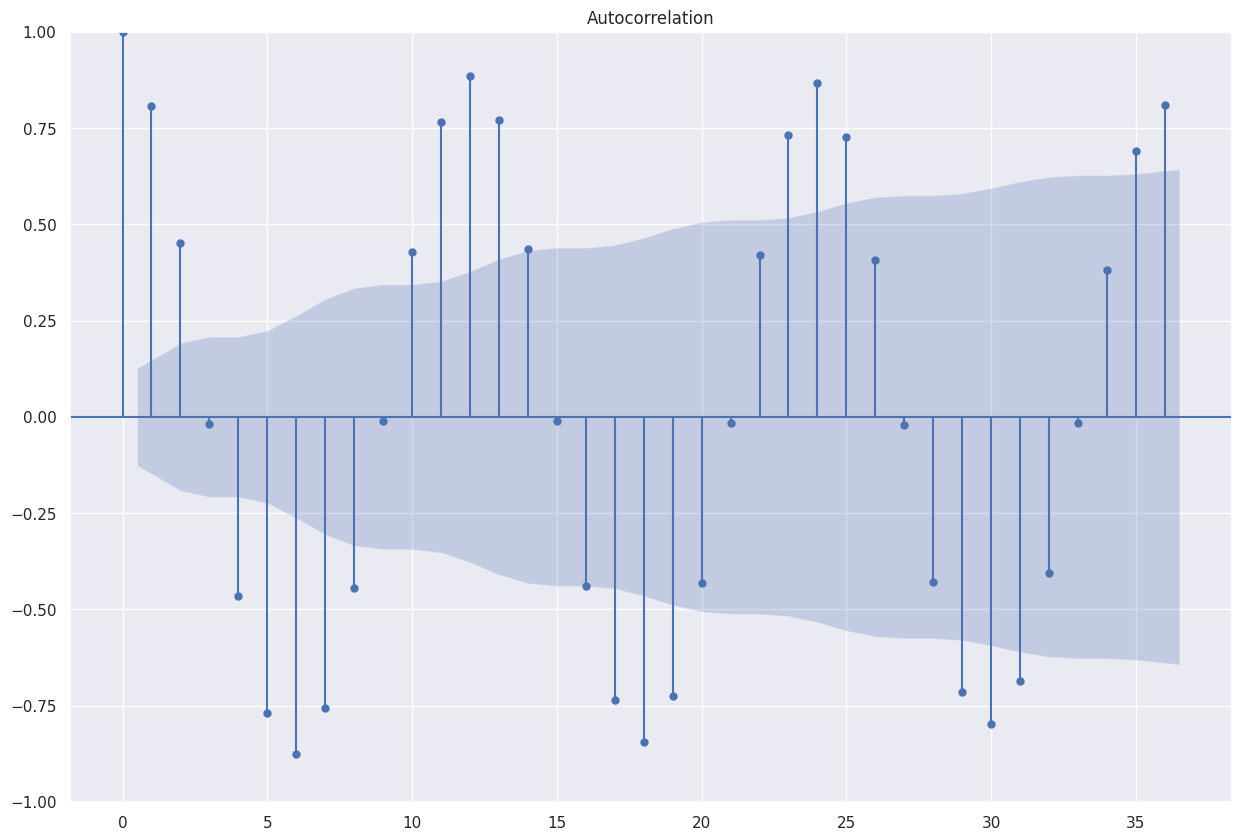

In [31]:
fig = tsaplots.plot_acf(mean_monthly.iloc[:, 1], lags=36)
plt.show()

Период 12

In [32]:
mean_monthly_series = np.diff(mean_monthly.iloc[:, 1], 12)

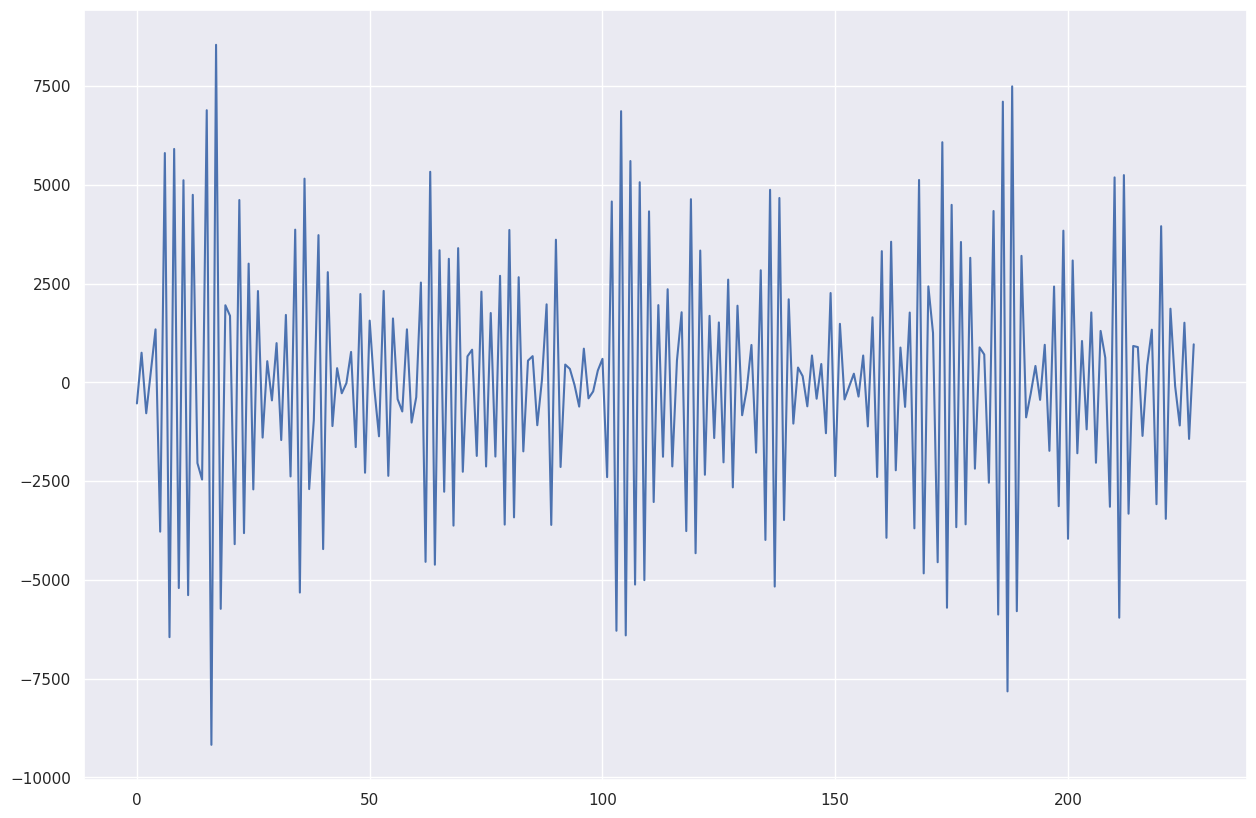

In [33]:
plt.plot(mean_monthly_series)

Проведём тест

In [34]:
print(f'p-value: {adfuller(mean_monthly_series)[1]}')

p-value: 1.388342430110589e-29


Ряд стационарен

#Monthly Boston Armed Robberies

([<matplotlib.axis.XTick at 0x7f6f537ffe50>,
 [Text(1, 0, '1966-02'), Text(76, 0, '1972-05')])

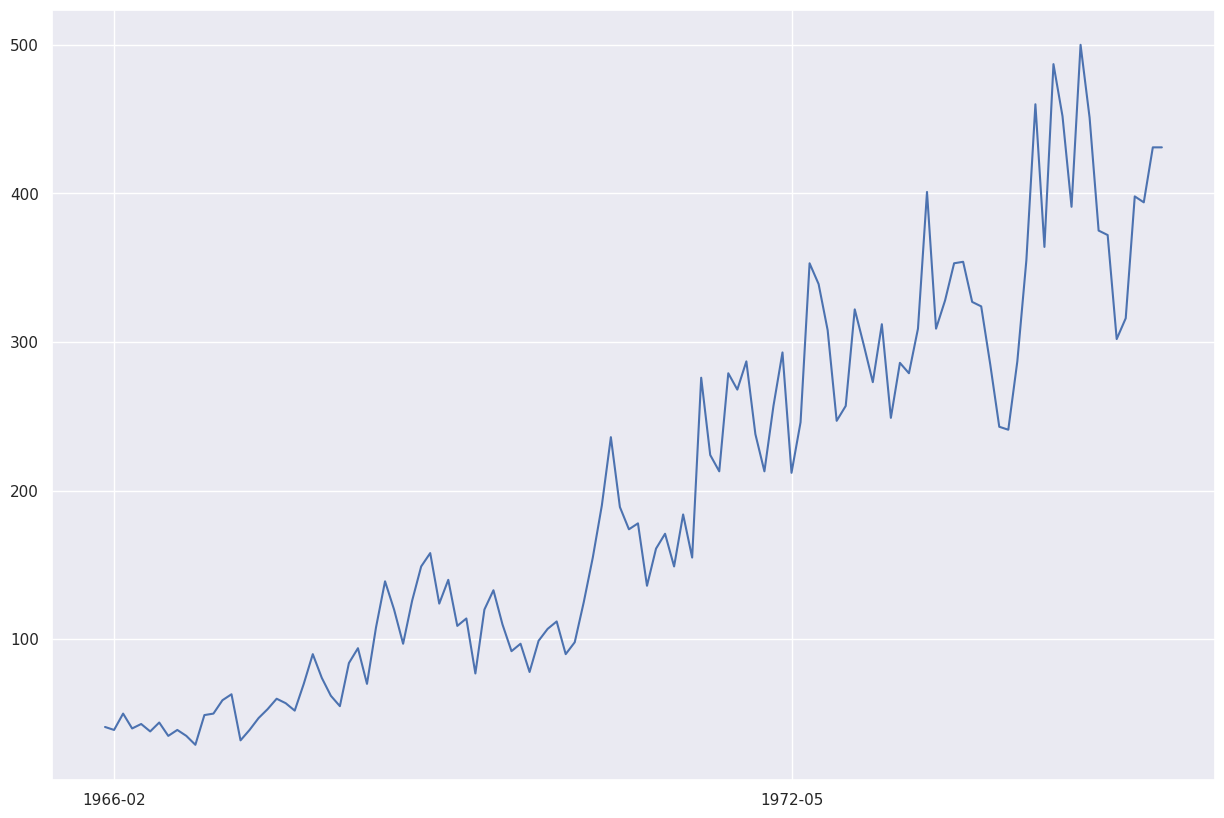

In [35]:
plt.plot(monthly_boston[monthly_boston.columns[0]], monthly_boston[monthly_boston.columns[1]])
plt.xticks(range(1, monthly_boston.shape[0], 75))

Ряд явно имеет тренд

In [36]:
monthly_boston_series = np.diff(monthly_boston.iloc[:, 1], 1)

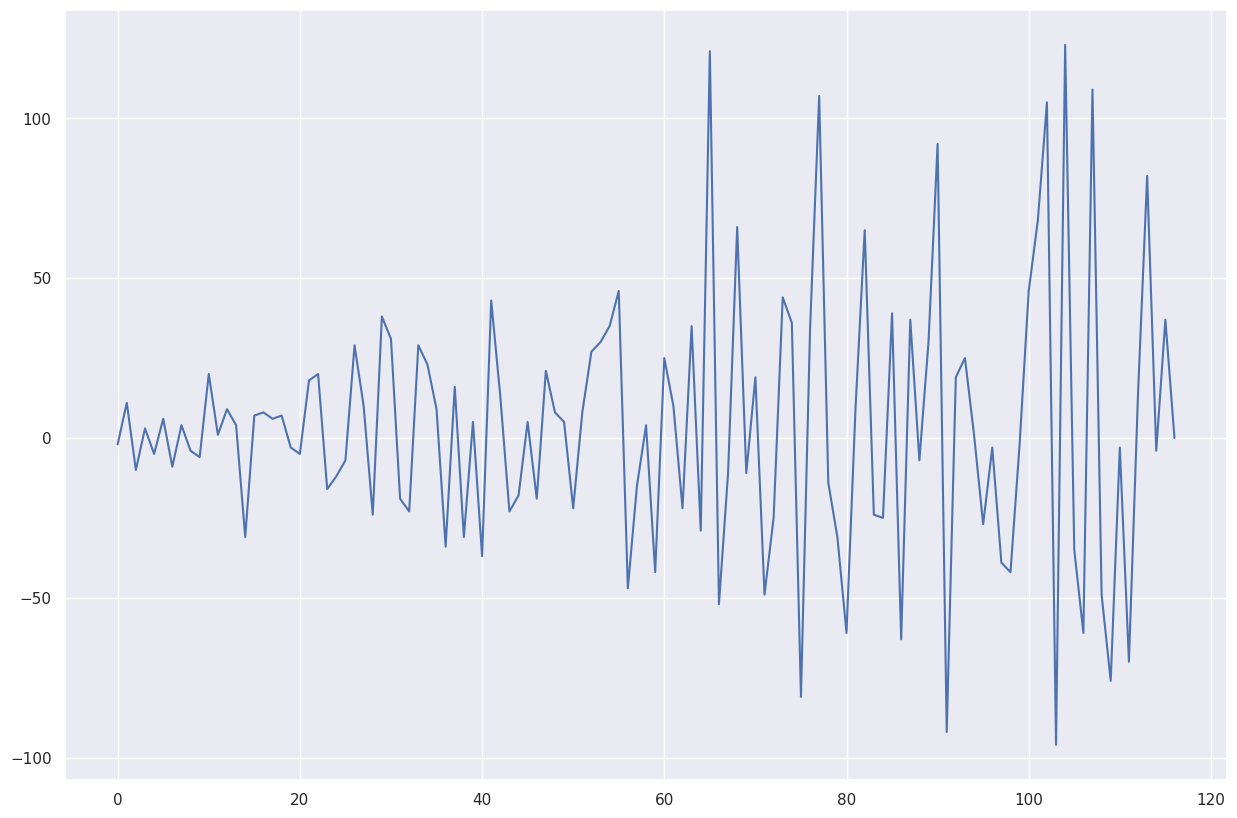

In [37]:
plt.plot(monthly_boston_series)

Проведём тест

In [38]:
adfuller(monthly_boston_series)[1]

6.450795412686658e-11

p-value < 0.05, ряд стационарен

#Monthly Sales Of Company

([<matplotlib.axis.XTick at 0x7f6f4fd61630>,
 [Text(1, 0, '1965-02'), Text(76, 0, '1971-05')])

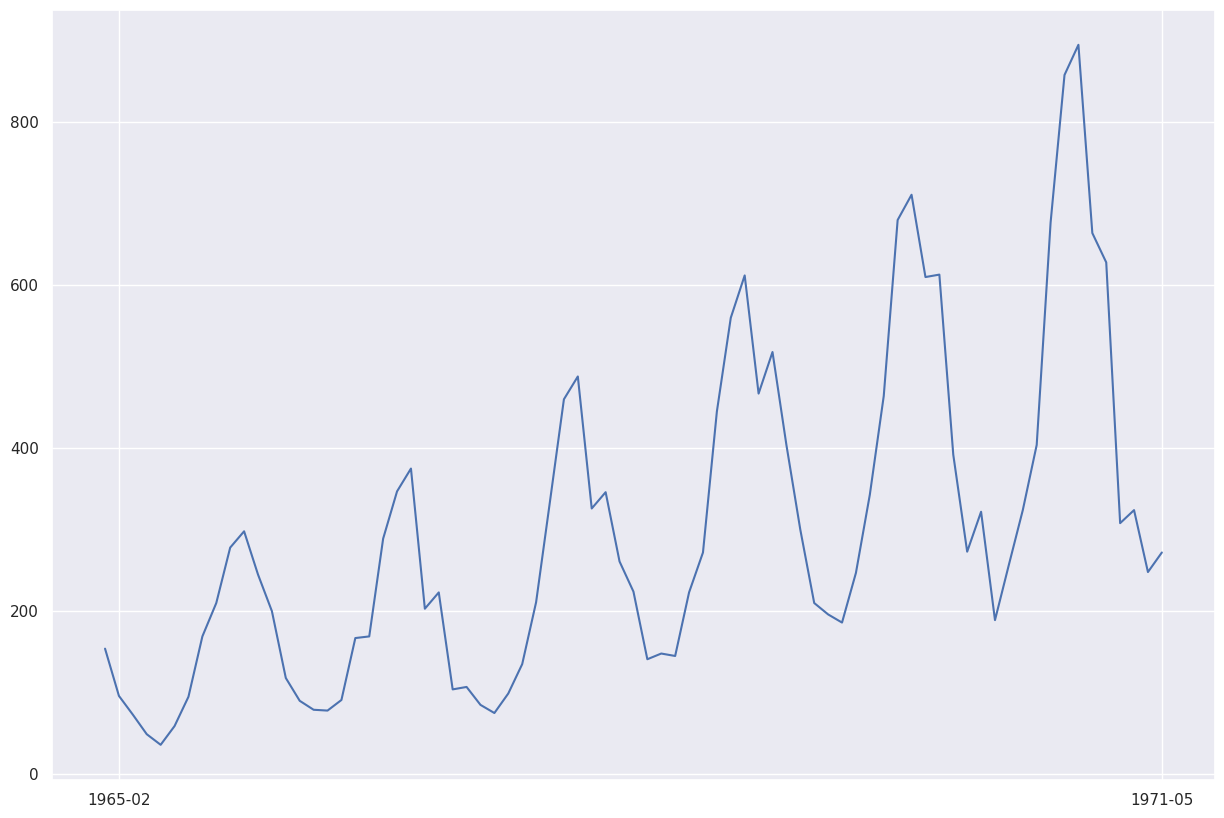

In [54]:
plt.plot(monthly_sales[monthly_sales.columns[0]], monthly_sales[monthly_sales.columns[1]])
plt.xticks(range(1, monthly_sales.shape[0], 75))

Ряд имеет тренд, сезонность и монотонно возрастающую дисперсию, избавимся сначала от монотонно возрастающей дисперсии, затем от сезонности и тренда

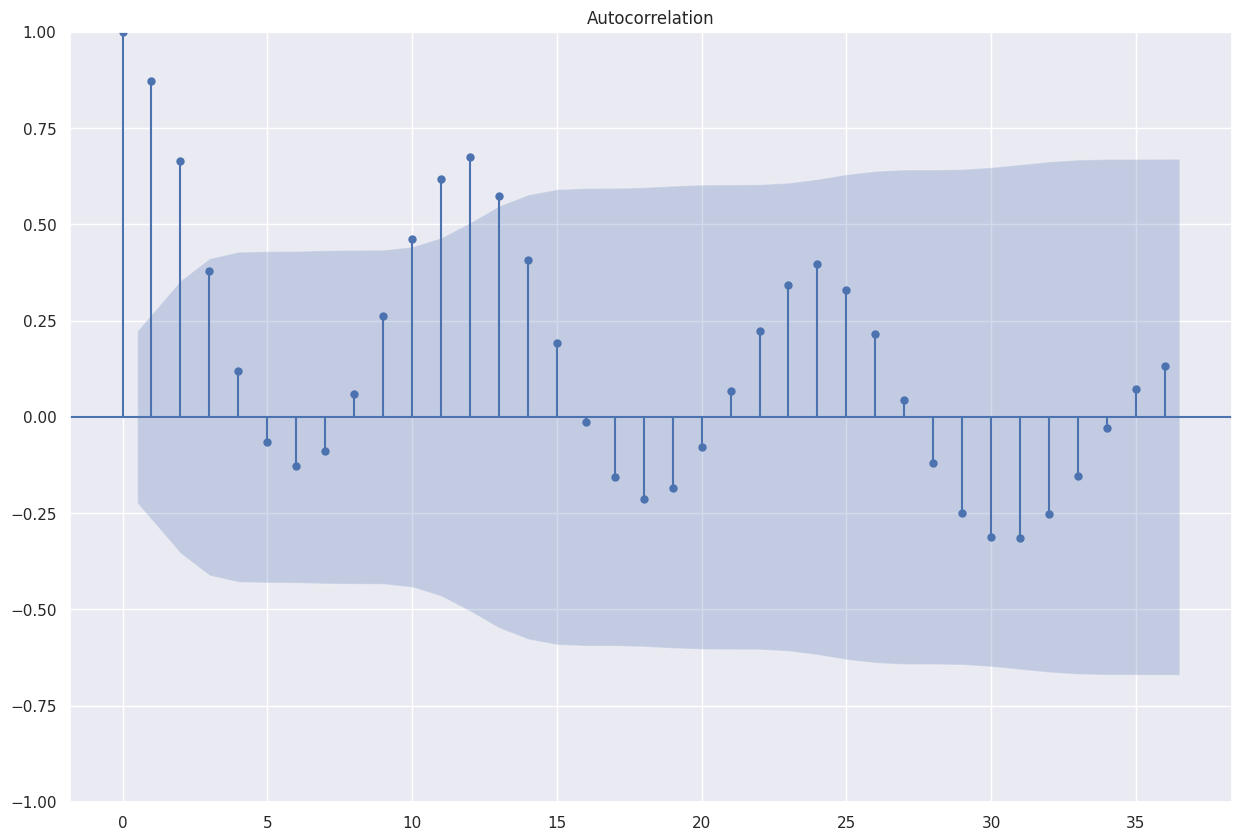

In [51]:
fig = tsaplots.plot_acf(monthly_sales.iloc[:, 1], lags=36)
fig.show()

In [55]:
monthly_sales_series = np.log(monthly_sales.iloc[:, 1])

In [56]:
monthly_sales_series = np.diff(monthly_sales_series, 12)

In [57]:
monthly_sales_series = np.diff(monthly_sales_series, 1)

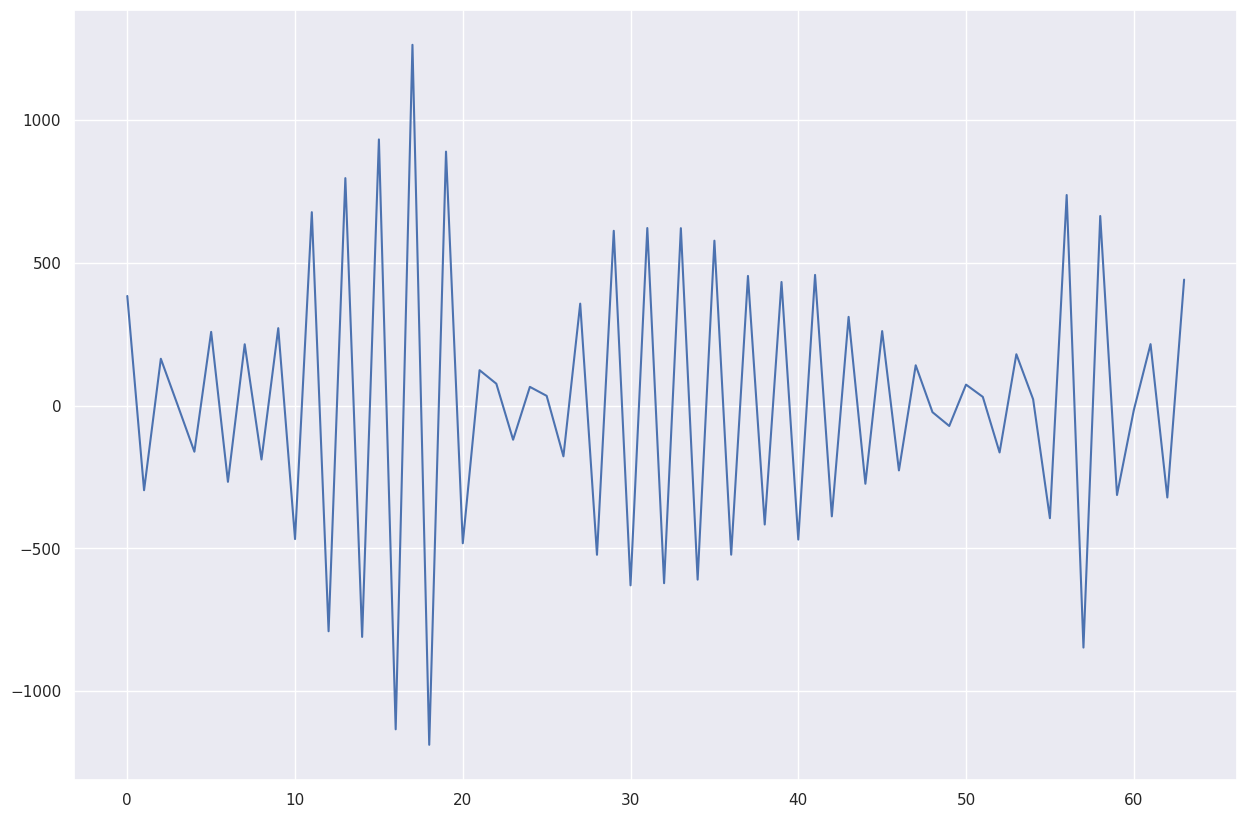

In [58]:
plt.plot(monthly_sales_series)

Проведём тест:

In [59]:
adfuller(monthly_sales_series)[1]

1.7002122579031977e-09

Ряд стационарен

#Weekly Closings Of The Dowjones

In [60]:
weekly_closings

,Week,Close
0,1971-W27,890.19
1,1971-W28,901.80
2,1971-W29,888.51
3,1971-W30,887.78
4,1971-W31,858.43
...,...,...
157,1974-W28,791.77
158,1974-W29,787.23
159,1974-W30,787.94
160,1974-W31,784.57


([<matplotlib.axis.XTick at 0x7f6f4fe860b0>,
 [Text(1, 0, '1971-W28'), Text(76, 0, '1972-W51'), Text(151, 0, '1974-W22')])

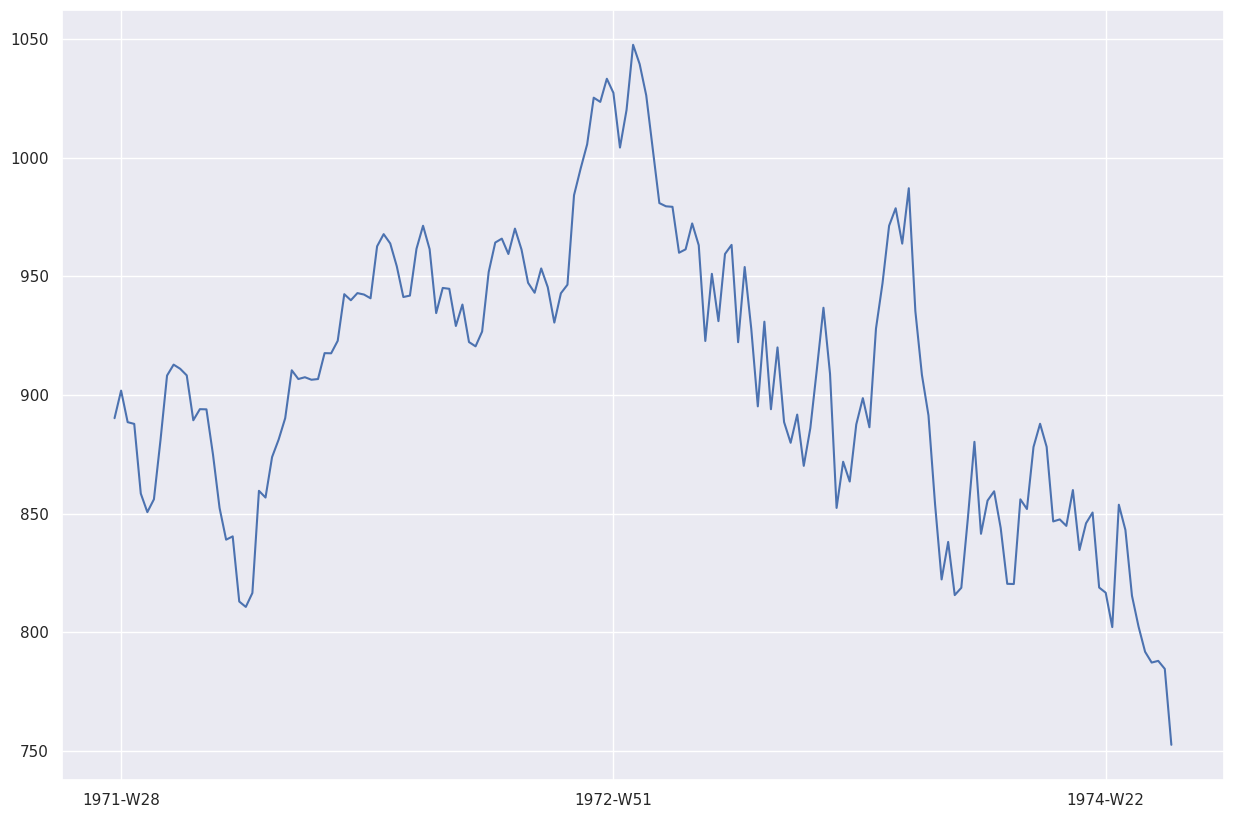

In [61]:
plt.plot(weekly_closings[weekly_closings.columns[0]], weekly_closings[weekly_closings.columns[1]])
plt.xticks(range(1, weekly_closings.shape[0], 75))

Посмотрим график автокорреляции

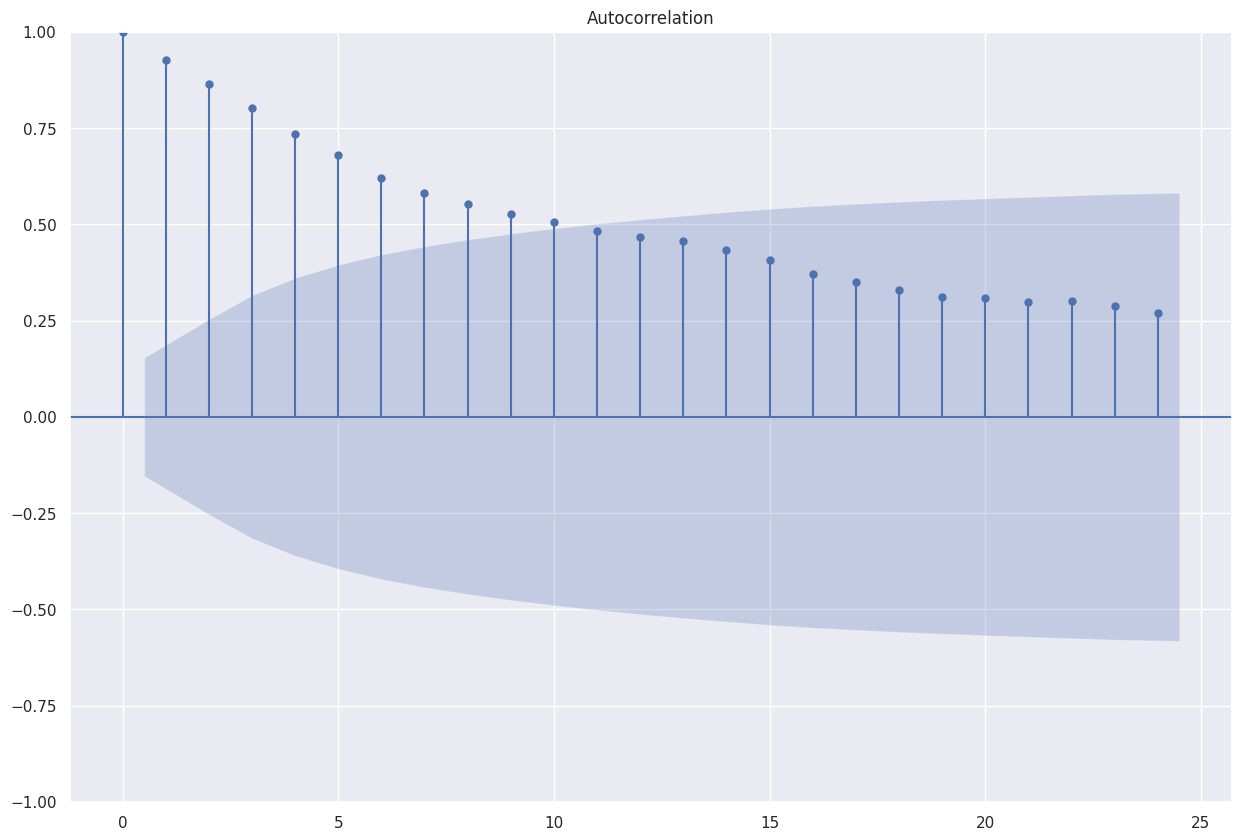

In [63]:
fig = tsaplots.plot_acf(weekly_closings.iloc[:, 1], lags=24)
fig.show()

Сезонности нет, избавимся от тренда

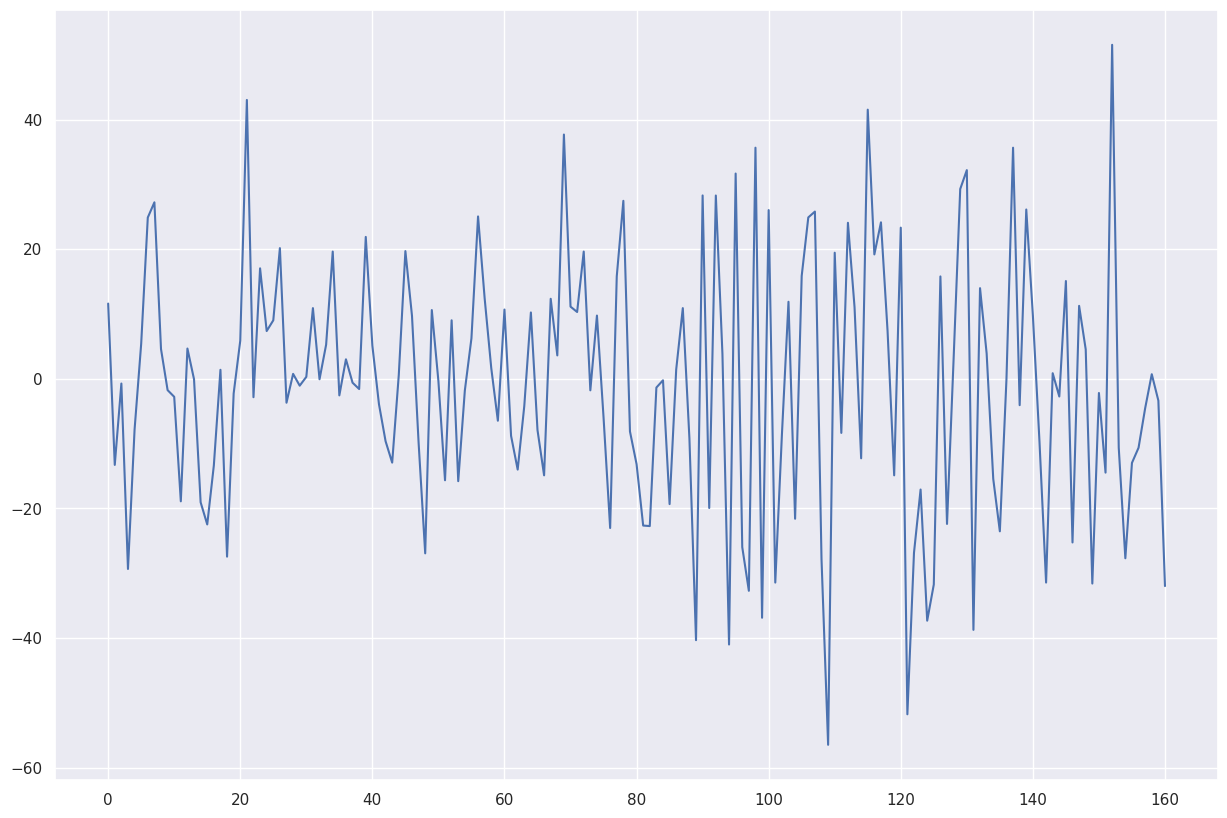

In [66]:
weekly_closings_series = np.diff(weekly_closings.iloc[:, 1], 1)
plt.plot(weekly_closings_series)

Проведём тест

In [67]:
adfuller(weekly_closings_series)[1]

2.4075864037417794e-24

Ряд стационарен